### import

In [5]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np

if os.path.basename(os.getcwd()) == 'notebooks':
    parent_dir = os.path.abspath(os.path.join('..'))  
    sys.path.append(parent_dir) 


from src.forward_diffusion import linear_beta_schedule, cosine_beta_schedule, sigmoid_beta_schedule, quadratic_beta_schedule

### Functions

In [6]:
def scheduler_plots(linear_beta, sigmoid_beta, quadratic_beta, cosine_beta1, cosine_beta2, timesteps):
    """
    Plots the beta schedules, cumulative alpha values, and Signal-to-Noise Ratios (SNR) for different schedules.

    """

    # Compute alphas
    linear_alpha    = 1 - linear_beta
    sigmoid_alpha   = 1 - sigmoid_beta
    cos_alpha1      = 1 - cosine_beta1
    cos_alpha2      = 1 - cosine_beta2

    # Compute cumulative alphas
    linear_alpha_cumprod    = np.cumprod(linear_alpha)
    sigmoid_alpha_cumprod   = np.cumprod(sigmoid_alpha)
    cos_alpha1_cumprod      = np.cumprod(cos_alpha1)
    cos_alpha2_cumprod      = np.cumprod(cos_alpha2)

    # Compute SNR for each schedule
    linear_snr  = linear_alpha_cumprod  / (1 - linear_alpha_cumprod)
    sigmoid_snr = sigmoid_alpha_cumprod / (1 - sigmoid_alpha_cumprod)
    cos_snr1    = cos_alpha1_cumprod    / (1 - cos_alpha1_cumprod)
    cos_snr2    = cos_alpha2_cumprod    / (1 - cos_alpha2_cumprod)


    fig = plt.figure(figsize=(8, 10))

    # Beta plot (top-left)
    ax1 = plt.subplot2grid((3, 2), (0, 0))
    ax1.plot(range(timesteps), linear_beta, label="Linear_001", linewidth=2, linestyle=":")
    ax1.plot(range(timesteps), sigmoid_beta, label="Sigmoid_001", linewidth=2, linestyle="--")
    ax1.plot(range(timesteps), cosine_beta1, label="Cosine_1", linewidth=2)
    ax1.plot(range(timesteps), cosine_beta2, label="Cosine_05", linewidth=2)
    ax1.set_xlabel("Timesteps t")
    ax1.set_ylabel("$\\beta_{t}$")
    ax1.set_title("Betas  $\\beta_{t}$")
    ax1.set_xlim(0, timesteps)
    ax1.set_yscale('log')
    ax1.grid(True)
    # ax1.legend()

    # Alpha plot (top-right)
    ax2 = plt.subplot2grid((3, 2), (0, 1))
    ax2.plot(range(timesteps), linear_alpha_cumprod, label="Linear_001", linewidth=2, linestyle=":")
    ax2.plot(range(timesteps), sigmoid_alpha_cumprod, label="Sigmoid_001", linewidth=2, linestyle="--")
    ax2.plot(range(timesteps), cos_alpha1_cumprod, label="Cosine_1", linewidth=2)
    ax2.plot(range(timesteps), cos_alpha2_cumprod, label="Cosine_05", linewidth=2)
    ax2.set_xlabel("Timesteps t")
    ax2.set_ylabel("$\\overline{\\alpha}_t$")
    ax2.set_title("Cumulative Alpha  $\\overline{\\alpha}_t$")
    ax2.set_xlim(0, timesteps)
    ax2.grid(True)
    # ax2.legend()

    # SNR plot (center-bottom)
    ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
    ax3.plot(range(timesteps), linear_snr, label="Linear_001", linewidth=2, linestyle=":")
    ax3.plot(range(timesteps), sigmoid_snr, label="Sigmoid_001", linewidth=2, linestyle="--")
    ax3.plot(range(timesteps), cos_snr1, label = r"Cosine_1", linewidth=2)
    ax3.plot(range(timesteps), cos_snr2, label = r"Cosine_05", linewidth=2)
    
    # Add colored regions for specified SNR levels
    # these regions are set by visula inspection of the forward diffusion
    ax3.fill_between(range(timesteps), 20, 5, color='yellow',   alpha=0.2)  
    ax3.fill_between(range(timesteps), 5, 1, color='orange',    alpha=0.2) 
    ax3.fill_between(range(timesteps), 1, 0.01, color='red',     alpha=0.2)

    
    ax3.set_yscale("log") 
    ax3.set_ylim(1e-3, 1e3)
    ax3.set_xlim(0, timesteps)
    ax3.set_xlabel("Timesteps t")
    ax3.set_ylabel("SNR")
    ax3.set_title("Signal-to-Noise Ratio  SNR")
    ax3.grid(True)
    ax3.legend()

    plt.tight_layout()
    plt.show()


### plots

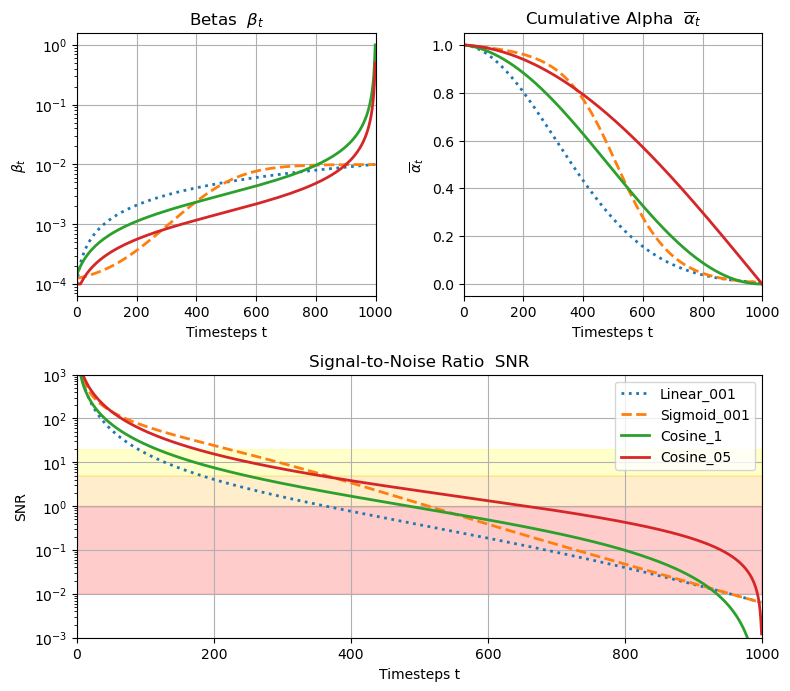

In [7]:
# Compute beta schedules
timesteps = 1000

linear_beta     = linear_beta_schedule   (timesteps, beta_start=0.0001, beta_end=0.01)
sigmoid_beta    = sigmoid_beta_schedule  (timesteps, beta_start=0.0001, beta_end=0.01)
quadratic_beta  = quadratic_beta_schedule(timesteps, beta_start=0.0001, beta_end=0.01)
cosine_beta1    = cosine_beta_schedule   (timesteps,          s=0.03,   beta_end=1)
cosine_beta2    = cosine_beta_schedule   (timesteps,          s=0.03,   beta_end=0.5)

scheduler_plots(
    linear_beta=linear_beta,
    sigmoid_beta=sigmoid_beta,
    quadratic_beta=quadratic_beta,
    cosine_beta1=cosine_beta1,
    cosine_beta2=cosine_beta2,
    timesteps=timesteps
)


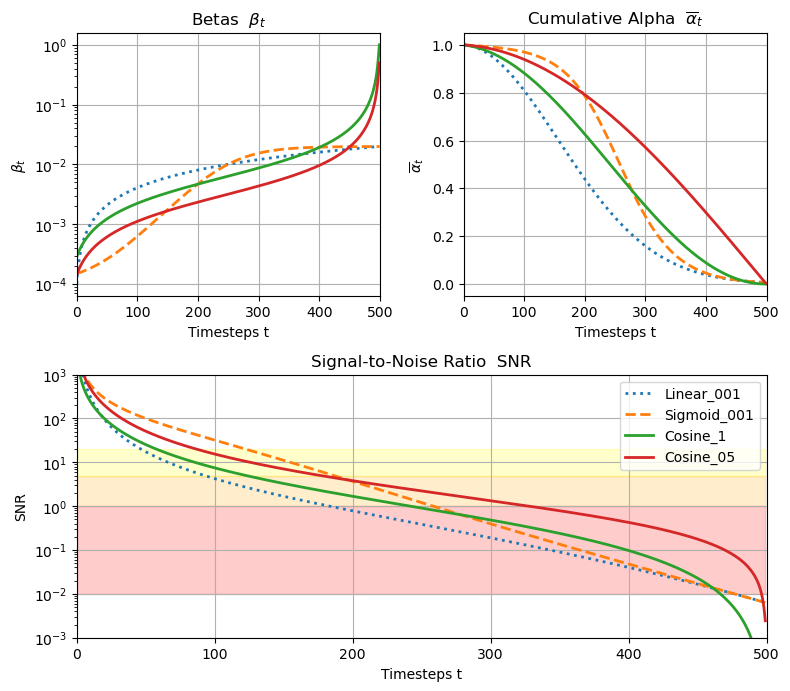

In [8]:
# Compute beta schedules
timesteps = 500
linear_beta = linear_beta_schedule(timesteps, beta_start=0.0001, beta_end=0.02)
sigmoid_beta = sigmoid_beta_schedule(timesteps, beta_start=0.0001, beta_end=0.02)
quadratic_beta = quadratic_beta_schedule(timesteps, beta_start=0.0001, beta_end=0.02)
cosine_beta1 = cosine_beta_schedule(timesteps, s=0.03, beta_end=1)
cosine_beta2 = cosine_beta_schedule(timesteps, s=0.03, beta_end=0.5)

scheduler_plots(
    linear_beta=linear_beta,
    sigmoid_beta=sigmoid_beta,
    quadratic_beta=quadratic_beta,
    cosine_beta1=cosine_beta1,
    cosine_beta2=cosine_beta2,
    timesteps=timesteps
)
